In [1]:
import numpy as np
import pandas as pd

In [2]:
#pip install sklearn
#pip install yellowbrick
#pip install sklearn-genetic
#pip install plotly
#pip install scipy
#pip install numpy
#pip install pandas
#pip install matplotlib
#pip install sklearn-genetic

In [3]:
import io
import plotly.offline as py#visualization
py.init_notebook_mode(connected=True)#visualization
import plotly.graph_objs as go#visualization
import plotly.tools as tls#visualization
import plotly.figure_factory as ff#visualization
import matplotlib.pyplot as plt#visualization
import plotly.subplots as subplt

In [4]:
df = pd.read_csv(r"churn-bigml-80.csv")
df['Churn'] = df['Churn'].replace({bool(True):1,bool(False):0})
df['International plan'] = df['International plan'].replace({'Yes':1,'No':0})
df['Voice mail plan'] = df['Voice mail plan'].replace({'Yes':1,'No':0})


churn=df.Churn.value_counts()[0]
no_churn=df.Churn.value_counts()[1]
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,OH,107,415,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,NJ,137,415,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,OH,84,408,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,OK,75,415,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


In [5]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(df['State'])
le.classes_
df['State'] = le.transform( df['State'] )
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,16,128,415,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,35,107,415,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,31,137,415,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,35,84,408,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,36,75,415,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


Churn=
2278
No Churn=
388


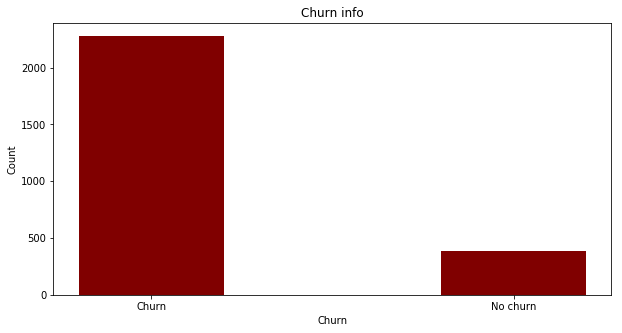

In [6]:
import numpy as np
import matplotlib.pyplot as plt
print("Churn=")
print(churn)
print("No Churn=")
print(no_churn)
  
# creating the dataset
data = {'Churn':churn, 'No churn':no_churn}
courses = list(data.keys())
values = list(data.values())
  
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(courses, values, color ='maroon',
        width = 0.4)
 
plt.xlabel("Churn")
plt.ylabel("Count")
plt.title("Churn info")
plt.show()

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from sklearn.metrics import roc_auc_score,roc_curve
from sklearn.metrics import f1_score
import statsmodels.api as sm
from sklearn.metrics import precision_score,recall_score
from yellowbrick.classifier import DiscriminationThreshold
#splitting train and test data 
train,test = train_test_split(df,test_size = .10 ,random_state = 111)
X = df.drop(['Churn'],axis=1) #'State',
target_col = ['Churn']
##seperating dependent and independent variables
cols    = X.columns
train_X = train[cols]
train_Y = train[target_col]
test_X  = test[cols]
test_Y  = test[target_col]

    
def telecom_churn_prediction(algorithm,training_x,testing_x,
                             training_y,testing_y,cols,cf,threshold_plot) :
    
    training_y = training_y.values.ravel()
    
    
    #model
    algorithm.fit(training_x,training_y)
    predictions   = algorithm.predict(testing_x)
    probabilities = algorithm.predict_proba(testing_x)
    #coeffs
    import joblib
    joblib.dump(algorithm, 'model.sav')
    print('train complete')
    
    print (algorithm)
    print ("\n Classification report : \n",classification_report(testing_y,predictions))
    acc_sc =  accuracy_score(testing_y,predictions)
    print ("Accuracy   Score : ",acc_sc )
    #confusion matrix
    conf_matrix = confusion_matrix(testing_y,predictions)
    #roc_auc_score
    model_roc_auc = roc_auc_score(testing_y,predictions) 
    print ("Area under curve : ",model_roc_auc,"\n")
    fpr,tpr,thresholds = roc_curve(testing_y,probabilities[:,1])
    print(conf_matrix )
    #plot confusion matrix
    trace1 = go.Heatmap(z = conf_matrix ,
                        x = ["Not churn","Churn"],
                        y = ["Not churn","Churn"],
                        showscale  = False,colorscale = "picnic",
                        name = "matrix")
    
    #plot roc curve
    trace2 = go.Scatter(x = fpr,y = tpr,
                        name = "Roc : " + str(model_roc_auc),
                        line = dict(color = ('rgb(22, 96, 167)'),width = 2))
    trace3 = go.Scatter(x = [0,1],y=[0,1],
                        line = dict(color = ('rgb(205, 12, 24)'),width = 2,
                        dash = 'dot'))
    
    
    
    #subplots
    fig = subplt.make_subplots(rows=2, cols=2, specs=[[{}, {}], [{'colspan': 2}, None]],
                            subplot_titles=('Confusion Matrix',
                                            'Receiver operating characteristic'))
    
    fig.append_trace(trace1,1,1)
    fig.append_trace(trace2,1,2)
    fig.append_trace(trace3,1,2)
    
    
    fig['layout'].update(showlegend=False, title="Model performance" ,
                         autosize = False,height = 900,width = 800,
                         plot_bgcolor = 'rgba(240,240,240, 0.95)',
                         paper_bgcolor = 'rgba(240,240,240, 0.95)',
                         margin = dict(b = 195))
    fig["layout"]["xaxis2"].update(dict(title = "false positive rate"))
    fig["layout"]["yaxis2"].update(dict(title = "true positive rate"))
    fig["layout"]["xaxis3"].update(dict(showgrid = True,tickfont = dict(size = 10),
                                        tickangle = 90))
    py.iplot(fig)
    
    if threshold_plot == True : 
        visualizer = DiscriminationThreshold(algorithm)
        visualizer.fit(training_x,training_y)
        visualizer.poof()      
    return acc_sc

In [8]:
#!pip install yellowbrick

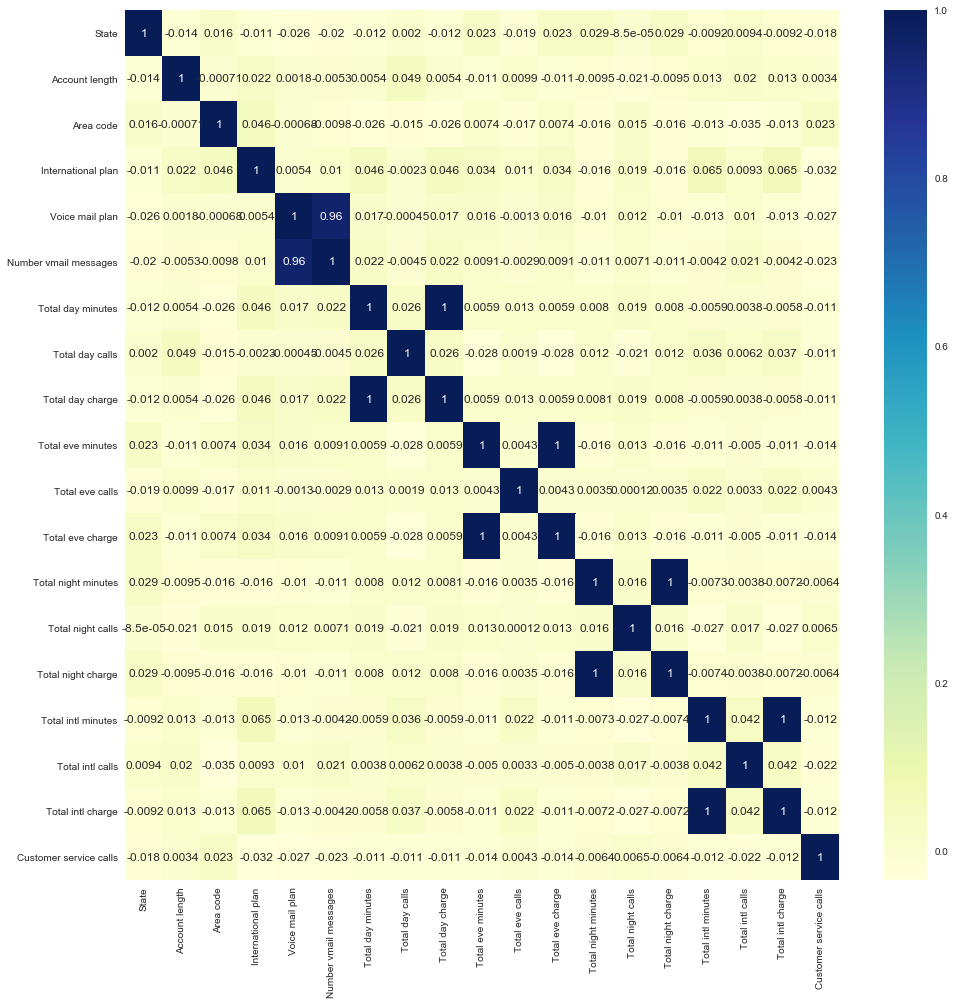

In [9]:
import seaborn as sb
plt.figure(figsize=(16, 16))
dataplot = sb.heatmap( train_X.corr() , cmap="YlGnBu", annot=True)
plt.show()

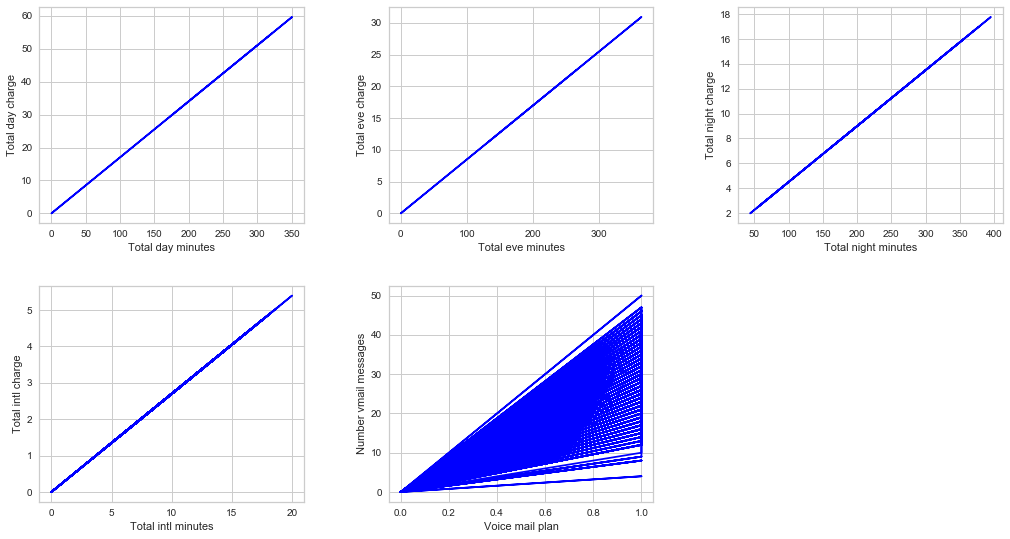

In [10]:
figure, axis = plt.subplots(2, 3)

axis[0, 0].plot(train_X['Total day minutes'] , train_X[ 'Total day charge'] , color='blue')
axis[0, 0].set_xlabel('Total day minutes' )
axis[0, 0].set_ylabel('Total day charge')

axis[0, 1].plot(train_X['Total eve minutes'] , train_X[ 'Total eve charge'] , color='blue')
axis[0, 1].set_xlabel('Total eve minutes' )
axis[0, 1].set_ylabel('Total eve charge')

axis[0, 2].plot(train_X['Total night minutes'] , train_X[ 'Total night charge'] , color='blue')
axis[0, 2].set_xlabel('Total night minutes')
axis[0, 2].set_ylabel('Total night charge')

axis[1, 0].plot(train_X['Total intl minutes'] , train_X[ 'Total intl charge'] , color='blue')
axis[1, 0].set_xlabel( 'Total intl minutes' )
axis[1, 0].set_ylabel( 'Total intl charge' )


axis[1, 1].plot(train_X['Voice mail plan'] , train_X[ 'Number vmail messages'] , color='blue')
axis[1, 1].set_xlabel( 'Voice mail plan' )
axis[1, 1].set_ylabel( 'Number vmail messages' )

axis[1,2].set_visible(False)
figure.tight_layout()
figure.set_figheight(8)
figure.set_figwidth(15)

plt.show()

train complete
DecisionTreeClassifier()

 Classification report : 
               precision    recall  f1-score   support

           0       0.92      0.95      0.94       219
           1       0.75      0.62      0.68        48

    accuracy                           0.90       267
   macro avg       0.84      0.79      0.81       267
weighted avg       0.89      0.90      0.89       267

Accuracy   Score :  0.8951310861423221
Area under curve :  0.7896689497716894 

[[209  10]
 [ 18  30]]


C:\Users\digvi\Anaconda3\lib\site-packages\sklearn\base.py:451: UserWarning:

X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names



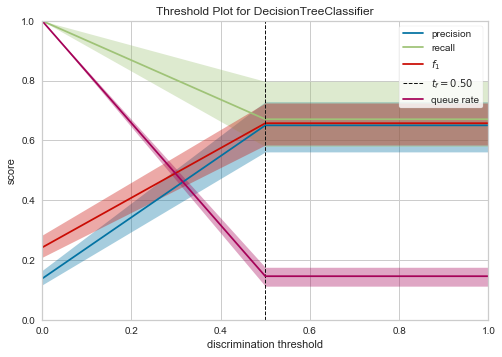

In [11]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()
dt_acc_score1 = telecom_churn_prediction(clf,train_X,test_X,train_Y,test_Y,
                         cols,"features",threshold_plot = True)

train complete
RandomForestClassifier(max_depth=20, random_state=10)

 Classification report : 
               precision    recall  f1-score   support

           0       0.94      0.99      0.96       219
           1       0.94      0.71      0.81        48

    accuracy                           0.94       267
   macro avg       0.94      0.85      0.89       267
weighted avg       0.94      0.94      0.94       267

Accuracy   Score :  0.9400749063670412
Area under curve :  0.8496004566210047 

[[217   2]
 [ 14  34]]


C:\Users\digvi\Anaconda3\lib\site-packages\sklearn\base.py:451: UserWarning:

X does not have valid feature names, but RandomForestClassifier was fitted with feature names



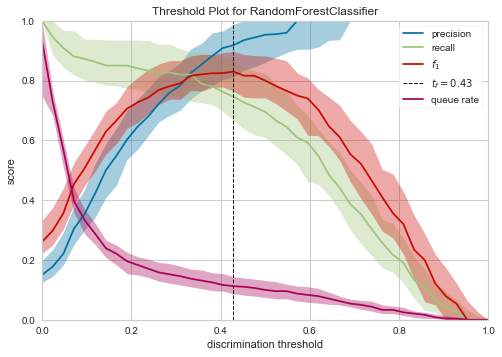

In [12]:
from sklearn.ensemble import RandomForestClassifier
clfr = RandomForestClassifier(max_depth=20, random_state=10)
rf_acc_score1  = telecom_churn_prediction(clfr,train_X,test_X,train_Y,test_Y,
                         cols,"features",threshold_plot = True)


train complete
KNeighborsClassifier(n_neighbors=3)

 Classification report : 
               precision    recall  f1-score   support

           0       0.86      0.95      0.90       219
           1       0.58      0.31      0.41        48

    accuracy                           0.84       267
   macro avg       0.72      0.63      0.65       267
weighted avg       0.81      0.84      0.81       267

Accuracy   Score :  0.8352059925093633
Area under curve :  0.6311358447488584 

[[208  11]
 [ 33  15]]


C:\Users\digvi\Anaconda3\lib\site-packages\sklearn\base.py:451: UserWarning:

X does not have valid feature names, but KNeighborsClassifier was fitted with feature names



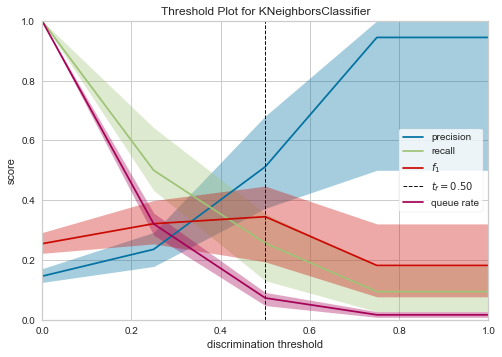

In [13]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=3)
knn_acc_score1 = telecom_churn_prediction(clf,train_X,test_X,train_Y,test_Y,
                         cols,"bag",threshold_plot = True)

In [14]:
"""
from sklearn.ensemble import BaggingClassifier

clf=BaggingClassifier(n_estimators=3)
bagc_acc_score1 = telecom_churn_prediction(clf,train_X,test_X,train_Y,test_Y,
                         cols,"bag",threshold_plot = True)

"""

'\nfrom sklearn.ensemble import BaggingClassifier\n\nclf=BaggingClassifier(n_estimators=3)\nbagc_acc_score1 = telecom_churn_prediction(clf,train_X,test_X,train_Y,test_Y,\n                         cols,"bag",threshold_plot = True)\n\n'

ANOVA f_score Analysis


International plan   Feature 3: 236.724024
Total day minutes   Feature 6: 89.140641
Total day charge   Feature 8: 89.141614
Customer service calls   Feature 18: 104.228074


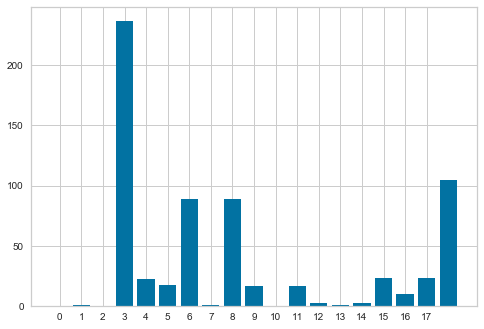

In [15]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
X_train = train_X 
y_train = train_Y.values.ravel()
X_test = test_X  
y_test = test_Y   

def select_features(X_train, y_train, X_test):
	# configure to select all features
	fs = SelectKBest(score_func=f_classif, k='all')
	# learn relationship from training data
	fs.fit(X_train, y_train)
	# transform train input data
	X_train_fs = fs.transform(X_train)
	# transform test input data
	X_test_fs = fs.transform(X_test)
	return X_train_fs, X_test_fs, fs

col = X_train.columns
X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test)
# what are scores for the features
mean = fs.scores_.mean()
for i in range(len(fs.scores_)):
    if fs.scores_[i]>mean:
        print(col[i] +'   Feature %d: %f'  % (i, fs.scores_[i])  )
# plot the scores
plt.bar([i for i in range(len(fs.scores_))], fs.scores_)
tick = np.arange(0, 18, 1)
plt.xticks(ticks=tick )
plt.show()

In [16]:
X = df.drop(['Churn'],axis=1) #'State',
target_col = ['Churn']
##seperating dependent and independent variables
cols    = X.columns
Y = df[target_col]
y = df[target_col].values.ravel()

In [17]:
from sklearn.datasets import load_breast_cancer
from genetic_selection import GeneticSelectionCV
from sklearn.tree import DecisionTreeClassifier
import pandas as pd
import numpy as np

def telecom_churn_prediction2(algorithm,training_x,testing_x,
                             training_y,testing_y,cols,cf,threshold_plot) :
    
    training_y = training_y.values.ravel()
    
    
    #model
    algorithm.fit(training_x,training_y)
    predictions   = algorithm.predict(testing_x)
    probabilities = algorithm.predict_proba(testing_x)
    #coeffs
    import joblib
    joblib.dump(algorithm, 'model.sav')
    print('train complete')
    
    print (algorithm)
    print ("\n Classification report : \n",classification_report(testing_y,predictions))
    acc_sc =  accuracy_score(testing_y,predictions)
    print ("Accuracy   Score : ",acc_sc )
    #confusion matrix
    conf_matrix = confusion_matrix(testing_y,predictions)
    #roc_auc_score
    model_roc_auc = roc_auc_score(testing_y,predictions) 
    print ("Area under curve : ",model_roc_auc,"\n")
    fpr,tpr,thresholds = roc_curve(testing_y,probabilities[:,1])
    print(conf_matrix )     
    return acc_sc

def feature_selection( max_feature ) :
    estimator = DecisionTreeClassifier()
    model = GeneticSelectionCV(
        estimator, cv=5, verbose=0,
        scoring="accuracy", max_features=max_feature,
        n_population=100, crossover_proba=0.5,
        mutation_proba=0.2, n_generations=50,
        crossover_independent_proba=0.5,
        mutation_independent_proba=0.04,
        tournament_size=3, n_gen_no_change=10,
        caching=True, n_jobs=-1)
    model = model.fit(X , y)
    print('Features:', X.columns[model.support_])
    return X.columns[model.support_].tolist()

selected_feature1 = feature_selection( 18 )
selected_feature2 = feature_selection( 10 )
selected_feature3 = feature_selection( 5 )

Features: Index(['State', 'Account length', 'Area code', 'International plan',
       'Voice mail plan', 'Total day minutes', 'Total day charge',
       'Total eve minutes', 'Total eve calls', 'Total eve charge',
       'Total night minutes', 'Total night charge', 'Total intl minutes',
       'Total intl calls', 'Total intl charge', 'Customer service calls'],
      dtype='object')
Features: Index(['State', 'International plan', 'Number vmail messages',
       'Total day minutes', 'Total eve charge', 'Total night minutes',
       'Total night charge', 'Total intl minutes', 'Total intl calls',
       'Customer service calls'],
      dtype='object')
Features: Index(['International plan', 'Total day charge', 'Total eve charge',
       'Total intl calls', 'Customer service calls'],
      dtype='object')


In [18]:
nf1 = len(selected_feature1)
nf2 = len(selected_feature2)
nf3 = len(selected_feature3)
print(nf1)
print(nf2)
print(nf3)

16
10
5


In [19]:
X1 = train_X[selected_feature1]
X2 = test_X[selected_feature1]

In [20]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()
dt_acc_score2 = telecom_churn_prediction2(clf,X1 , X2 ,train_Y,test_Y,
                         cols,"features",threshold_plot = True)

train complete
DecisionTreeClassifier()

 Classification report : 
               precision    recall  f1-score   support

           0       0.93      0.94      0.93       219
           1       0.70      0.69      0.69        48

    accuracy                           0.89       267
   macro avg       0.82      0.81      0.81       267
weighted avg       0.89      0.89      0.89       267

Accuracy   Score :  0.8913857677902621
Area under curve :  0.8117865296803652 

[[205  14]
 [ 15  33]]


In [21]:
from sklearn.ensemble import RandomForestClassifier
clfr = RandomForestClassifier(max_depth=20, random_state=10)
rf_acc_score2  = telecom_churn_prediction2(clfr,X1 , X2 ,train_Y,test_Y,
                         cols,"features",threshold_plot = True)

train complete
RandomForestClassifier(max_depth=20, random_state=10)

 Classification report : 
               precision    recall  f1-score   support

           0       0.94      1.00      0.96       219
           1       0.97      0.69      0.80        48

    accuracy                           0.94       267
   macro avg       0.95      0.84      0.88       267
weighted avg       0.94      0.94      0.94       267

Accuracy   Score :  0.9400749063670412
Area under curve :  0.841466894977169 

[[218   1]
 [ 15  33]]


In [22]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=3)
knn_acc_score2 = telecom_churn_prediction2(clf,X1 , X2 ,train_Y,test_Y,
                         cols,"bag",threshold_plot = True)

train complete
KNeighborsClassifier(n_neighbors=3)

 Classification report : 
               precision    recall  f1-score   support

           0       0.85      0.95      0.90       219
           1       0.50      0.23      0.31        48

    accuracy                           0.82       267
   macro avg       0.67      0.59      0.61       267
weighted avg       0.79      0.82      0.79       267

Accuracy   Score :  0.8202247191011236
Area under curve :  0.5894691780821918 

[[208  11]
 [ 37  11]]


In [23]:
X1 = train_X[selected_feature2]
X2 = test_X[selected_feature2]
clf = tree.DecisionTreeClassifier()
dt_acc_score3 = telecom_churn_prediction2(clf,X1 , X2 ,train_Y,test_Y,
                         cols,"features",threshold_plot = True)

clfr = RandomForestClassifier(max_depth=20, random_state=10)
rf_acc_score3  = telecom_churn_prediction2(clfr,X1 , X2 ,train_Y,test_Y,
                         cols,"features",threshold_plot = True)

clf = KNeighborsClassifier(n_neighbors=3)
knn_acc_score3 = telecom_churn_prediction2(clf,X1 , X2 ,train_Y,test_Y,
                         cols,"bag",threshold_plot = True)

train complete
DecisionTreeClassifier()

 Classification report : 
               precision    recall  f1-score   support

           0       0.95      0.94      0.94       219
           1       0.74      0.77      0.76        48

    accuracy                           0.91       267
   macro avg       0.84      0.86      0.85       267
weighted avg       0.91      0.91      0.91       267

Accuracy   Score :  0.9101123595505618
Area under curve :  0.8557363013698631 

[[206  13]
 [ 11  37]]
train complete
RandomForestClassifier(max_depth=20, random_state=10)

 Classification report : 
               precision    recall  f1-score   support

           0       0.94      1.00      0.97       219
           1       0.97      0.73      0.83        48

    accuracy                           0.95       267
   macro avg       0.96      0.86      0.90       267
weighted avg       0.95      0.95      0.94       267

Accuracy   Score :  0.947565543071161
Area under curve :  0.8623002283105022 


In [24]:
X1 = train_X[selected_feature3]
X2 = test_X[selected_feature3]
clf = tree.DecisionTreeClassifier()
dt_acc_score4 = telecom_churn_prediction2(clf,X1 , X2 ,train_Y,test_Y,
                         cols,"features",threshold_plot = True)

clfr = RandomForestClassifier(max_depth=20, random_state=10)
rf_acc_score4  = telecom_churn_prediction2(clfr,X1 , X2 ,train_Y,test_Y,
                         cols,"features",threshold_plot = True)

clf = KNeighborsClassifier(n_neighbors=3)
knn_acc_score4 = telecom_churn_prediction2(clf,X1 , X2 ,train_Y,test_Y,
                         cols,"bag",threshold_plot = True)

train complete
DecisionTreeClassifier()

 Classification report : 
               precision    recall  f1-score   support

           0       0.93      0.92      0.93       219
           1       0.66      0.69      0.67        48

    accuracy                           0.88       267
   macro avg       0.80      0.80      0.80       267
weighted avg       0.88      0.88      0.88       267

Accuracy   Score :  0.8801498127340824
Area under curve :  0.8049372146118723 

[[202  17]
 [ 15  33]]
train complete
RandomForestClassifier(max_depth=20, random_state=10)

 Classification report : 
               precision    recall  f1-score   support

           0       0.94      0.95      0.95       219
           1       0.76      0.73      0.74        48

    accuracy                           0.91       267
   macro avg       0.85      0.84      0.85       267
weighted avg       0.91      0.91      0.91       267

Accuracy   Score :  0.9101123595505618
Area under curve :  0.8394691780821917 

In [25]:
data = [  [ dt_acc_score1 ,dt_acc_score2 ,dt_acc_score3 ,dt_acc_score4 ] , 
          [ rf_acc_score1 , rf_acc_score2 , rf_acc_score3, rf_acc_score4 ] ,
          [ knn_acc_score1 ,knn_acc_score2 , knn_acc_score3 , knn_acc_score4 ]]
  
# Create the pandas DataFrame
f1 = str(nf1) + " Features"
f2 = str(nf2) + " Features"
f3 = str(nf3) + " Features"
result_df = pd.DataFrame(data, columns = ['All Features', f1, f2 , f3])


#['Decision Tree ', 'Random Forest','KNN']


result_df.index=['Decision Tree', 'Random Forest','KNN']
print(result_df)
for i in range(0 , len(result_df.index  )):
#result_df = result_df.transpose()
    for j in range(0 , len( result_df.columns )):
        temp = result_df.iloc[i , j]*100
        result_df.iloc[i , j] = float( ("%.3f" % temp) )

result_df


               All Features  16 Features  10 Features  5 Features
Decision Tree      0.895131     0.891386     0.910112    0.880150
Random Forest      0.940075     0.940075     0.947566    0.910112
KNN                0.835206     0.820225     0.850187    0.880150


,All Features,16 Features,10 Features,5 Features
Decision Tree,89.513,89.139,91.011,88.015
Random Forest,94.007,94.007,94.757,91.011
KNN,83.521,82.022,85.019,88.015


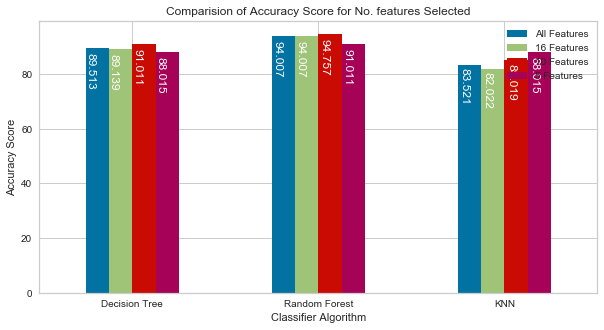

In [26]:
ax = result_df.plot(kind='bar', figsize=(10, 5))
plt.xlabel('Classifier Algorithm')
plt.ylabel('Accuracy Score')
plt.xticks(rotation = 0)

plt.title('Comparision of Accuracy Score for No. features Selected')
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 0.95) , rotation=-90,color = 'white')

Now as Random Forest with 10 features has high accuracy we will us it to perdict final result (Some times its 9)

In [27]:
df = pd.read_csv(r"churn-bigml-20.csv")
df['International plan'] = df['International plan'].replace({'Yes':1,'No':0})
df['Voice mail plan'] = df['Voice mail plan'].replace({'Yes':1,'No':0})

#X = df.drop(['State'],axis=1)
X = X[selected_feature2]

from sklearn.ensemble import RandomForestClassifier
clfr = RandomForestClassifier(max_depth=20, random_state=10)

X1 = train_X[selected_feature2]

clfr.fit( X1, train_Y)
prediction=clfr.predict(X)
pd.DataFrame(prediction, columns=['pred1']).to_csv('data1.csv')
name = pd.read_csv('churn-bigml-20.csv')
job = pd.read_csv('data1.csv')
new_file = name.join(job, lsuffix="_left", rsuffix="_right")
new_file.to_csv('output.csv', index=False)

C:\Users\digvi\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

